In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/heart.csv')

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
data.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
data.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [ ]:
data.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
import matplotlib.pyplot as plt

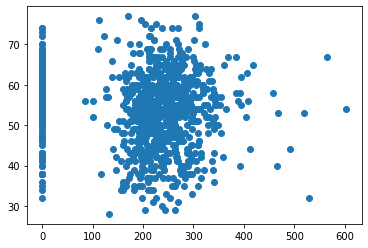

In [ ]:
plt.scatter(data[['Cholesterol']], data[['Age']])

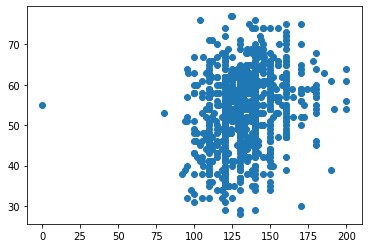

In [ ]:
plt.scatter(data['RestingBP'], data['Age'])
# data.head()

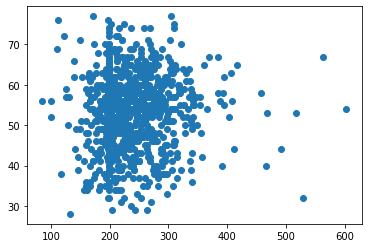

In [ ]:
plt.scatter(data['Cholesterol'], data[['Age']])

In [ ]:
# data.drop(data.index[data['Cholesterol'] == 0], inplace = True)
data.drop(data.index[data['RestingBP'] == 0], inplace = True)
data.shape

(917, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    object 
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    int64  
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    object 
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    object 
 11  HeartDisease    917 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.1+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
data['ChestPainType'] = le.fit_transform(data['ChestPainType'])
data['RestingECG'] = le.fit_transform(data['RestingECG'])
data['ST_Slope'] = le.fit_transform(data['ST_Slope'])
data['Sex'] = le.fit_transform(data['Sex'])
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_data = pd.DataFrame(enc.fit_transform(data[['ChestPainType']]).toarray())
data = data.join(enc_data)

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,0,1,2,3
0,40,1,1,140,289,0,1,172,0,0.0,2,0,0.0,1.0,0.0,0.0
1,49,0,2,160,180,0,1,156,0,1.0,1,1,0.0,0.0,1.0,0.0
2,37,1,1,130,283,0,2,98,0,0.0,2,0,0.0,1.0,0.0,0.0
3,48,0,0,138,214,0,1,108,1,1.5,1,1,1.0,0.0,0.0,0.0
4,54,1,2,150,195,0,1,122,0,0.0,2,0,0.0,0.0,1.0,0.0


In [ ]:
data.Cholesterol.mean()

236.08803215942953

In [ ]:
x = data.drop(columns=data[['HeartDisease']])

In [ ]:
y = data['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', random_state=1)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
model.predict(x_test)

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
model.score(x_test, y_test)

0.822463768115942

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelrf = RandomForestClassifier(random_state=1)

In [ ]:
modelrf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
modelrf.score(x_test, y_test)

0.8768115942028986

Score before replacing cholesterol 0 values with mean = dtree: around 82, rf: 85

After = dtree: 84, rf: 86.9


In [ ]:
x.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
Age,1.000000,0.055670,-0.077439,0.263084,0.006513,0.198170,-0.007487,-0.382280,0.216017,0.258563,-0.268217
Sex,0.055670,1.000000,-0.127408,0.009427,-0.150955,0.120424,0.071553,-0.189668,0.191226,0.105444,-0.150408
ChestPainType,-0.077439,-0.127408,1.000000,-0.011020,-0.045796,-0.072461,-0.072625,0.288465,-0.354027,-0.178367,0.214582
RestingBP,0.263084,0.009427,-0.011020,1.000000,0.096541,0.067823,0.023455,-0.109693,0.153064,0.174252,-0.082155
Cholesterol,0.006513,-0.150955,-0.045796,0.096541,1.000000,-0.062391,-0.120645,0.073198,0.046727,0.059568,-0.013531
FastingBS,0.198170,0.120424,-0.072461,0.067823,-0.062391,1.000000,0.087074,-0.131067,0.059988,0.053062,-0.176196
RestingECG,-0.007487,0.071553,-0.072625,0.023455,-0.120645,0.087074,1.000000,-0.179339,0.077545,-0.020452,-0.006768
MaxHR,-0.382280,-0.189668,0.288465,-0.109693,0.073198,-0.131067,-0.179339,1.000000,-0.370023,-0.161213,0.344047
ExerciseAngina,0.216017,0.191226,-0.354027,0.153064,0.046727,0.059988,0.077545,-0.370023,1.000000,0.409494,-0.429483
Oldpeak,0.258563,0.105444,-0.178367,0.174252,0.059568,0.053062,-0.020452,-0.161213,0.409494,1.000000,-0.501735


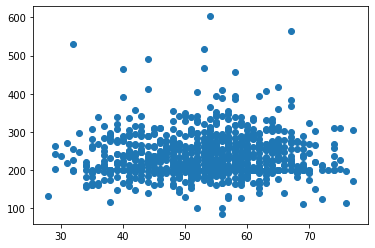

In [ ]:
plt.scatter(x['Age'], x['Cholesterol'])

In [ ]:
new_data = pd.read_csv('/content/heart.csv')
df_pred_chol = new_data[new_data.Cholesterol == 0]
df_pred_chol.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1


In [ ]:
new_data['ChestPainType'] = le.fit_transform(new_data['ChestPainType'])
new_data['RestingECG'] = le.fit_transform(new_data['RestingECG'])
new_data['ST_Slope'] = le.fit_transform(new_data['ST_Slope'])
new_data['Sex'] = le.fit_transform(new_data['Sex'])
new_data['ExerciseAngina'] = le.fit_transform(new_data['ExerciseAngina'])

In [ ]:
dum_new_data = pd.get_dummies(new_data, columns=["ChestPainType", "RestingECG", "ST_Slope", "Sex", "ExerciseAngina"], prefix=["CPT_Type", "RECG_Type", "ST_Slope", "Sex", "ExerciseAngina"] )

In [ ]:
dum_new_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,CPT_Type_0,CPT_Type_1,CPT_Type_2,CPT_Type_3,RECG_Type_0,RECG_Type_1,RECG_Type_2,ST_Slope_0,ST_Slope_1,ST_Slope_2,Sex_0,Sex_1,ExerciseAngina_0,ExerciseAngina_1
0,40,140,289,0,172,0.0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0
1,49,160,180,0,156,1.0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0
3,48,138,214,0,108,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1
4,54,150,195,0,122,0.0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0


In [ ]:
df_pred_chol = new_data[new_data.Cholesterol != 0]
df_pred_chol.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
test_chol = df_pred_chol[['Age']]
test_chol.head()

,Age
0,40
1,49
2,37
3,48
4,54


In [ ]:
train_chol = df_pred_chol[['Age', 'Cholesterol']]

In [ ]:
train_chol.head()

,Age,Cholesterol
0,40,289
1,49,180
2,37,283
3,48,214
4,54,195


In [ ]:
train_chol.describe()

,Age,Cholesterol
count,746.000000,746.000000
mean,52.882038,244.635389
std,9.505888,59.153524
min,28.000000,85.000000
25%,46.000000,207.250000
50%,54.000000,237.000000
75%,59.000000,275.000000
max,77.000000,603.000000


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(train_chol[['Age']], train_chol[['Cholesterol']])

LinearRegression()

In [ ]:
predicted_chol = lr.predict(test_chol)

In [ ]:
# new_data['Cholesterol'] = new_data['Cholesterol'].replace(0, predicted_chol)

In [ ]:
dum_new_data.shape

(918, 21)

In [ ]:
count = 0
for i in range(0, 918):
  if dum_new_data['Cholesterol'][i] == 0:
    dum_new_data['Cholesterol'][i] = predicted_chol[count]
    count+=1

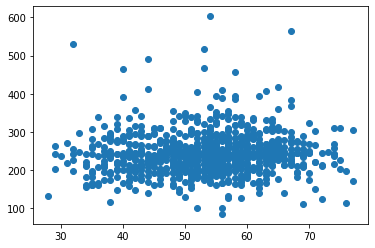

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(new_data['Age'], new_data['Cholesterol'])

In [ ]:
dum_new_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,CPT_Type_0,CPT_Type_1,CPT_Type_2,CPT_Type_3,RECG_Type_0,RECG_Type_1,RECG_Type_2,ST_Slope_0,ST_Slope_1,ST_Slope_2,Sex_0,Sex_1,ExerciseAngina_0,ExerciseAngina_1
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,244.178649,0.233115,136.809368,0.887364,0.553377,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900,0.068627,0.501089,0.430283,0.210240,0.789760,0.595861,0.404139
std,9.432617,18.514154,53.341646,0.423046,25.460334,1.066570,0.497414,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567,0.252957,0.500271,0.495386,0.407701,0.407701,0.490992,0.490992
min,28.000000,0.000000,85.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,54.000000,130.000000,241.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x_new = dum_new_data.drop(columns=['HeartDisease'])

In [ ]:
y_new = dum_new_data['HeartDisease']

In [ ]:
x_new.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,CPT_Type_0,CPT_Type_1,CPT_Type_2,CPT_Type_3,RECG_Type_0,RECG_Type_1,RECG_Type_2,ST_Slope_0,ST_Slope_1,ST_Slope_2,Sex_0,Sex_1,ExerciseAngina_0,ExerciseAngina_1
0,40,140,289,0,172,0.0,0,1,0,0,0,1,0,0,0,1,0,1,1,0
1,49,160,180,0,156,1.0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
2,37,130,283,0,98,0.0,0,1,0,0,0,0,1,0,0,1,0,1,1,0
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,0,1,0,1,0,0,1
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,0,1,0,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split
x_trainn, x_testt, y_trainn, y_testt = train_test_split(x_new, y_new, test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_trainn, y_trainn)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
dt.score(x_testt, y_testt)

0.7862318840579711

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy')
rf.fit(x_trainn, y_trainn)

RandomForestClassifier(criterion='entropy')

In [ ]:
rf.score(x_testt, y_testt)

0.8405797101449275

In [ ]:
rf1 = RandomForestClassifier(criterion='entropy', random_state=1, n_estimators=250, n_jobs=-1)
rf1.fit(x_trainn, y_trainn)

RandomForestClassifier(criterion='entropy', n_estimators=250, n_jobs=-1,
                       random_state=1)

In [ ]:
rf1.score(x_testt, y_testt)

0.855072463768116